In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing empolyee data set

#### Resetting the index name as 'name'

In [2]:
df = pd.read_csv('employee.csv',index_col=0)
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Allen Smith to Leo Duck
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                7 non-null      float64
 1   income             7 non-null      float64
 2   gender             7 non-null      object 
 3   department         9 non-null      object 
 4   grade              9 non-null      object 
 5   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 504.0+ bytes


In [4]:
df.isnull().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

columns age, income and gender has two null values each

In [5]:
df.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


In [6]:
df.describe(include=object)

,gender,department,grade
count,7,9,9
unique,2,3,4
top,F,Operations,G3
freq,5,3,5


### Selecting specific rows

In [7]:
df1=df.loc[['Jack Morgan','Josh Wills']]
df1

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


### Selecting data for multiple values

In [8]:
df2=df[df['department']=='Sales']
df3=df[df['department']=='Finance']
pd.concat([df2,df3],axis=0)

,age,income,gender,department,grade,performance_score
name,,,,,,
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Leo Duck,23.0,98000.0,M,Sales,G4,709
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


In [9]:
#OR

In [10]:
df[(df['department']=='Finance')|(df['department']=='Sales')]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### Displaying employees who has performance score more than 700

In [11]:
df[df['performance_score']>700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### Displaying employees who has performance score more than 500 and less than 700

In [12]:
df[(df['performance_score']>500) & (df['performance_score']<700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


### Handling the missing values

In [13]:
df.isnull().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

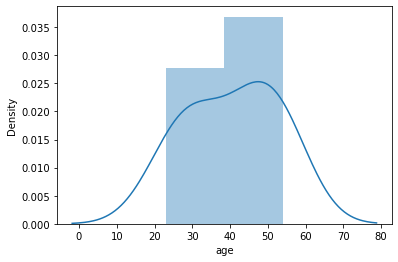

In [14]:
x = df['age']
sns.distplot(x)

In [15]:
df['age']=df['age'].fillna(df['age'].mean())
df['age']

name
Allen Smith      45.000000
S Kumar          40.428571
Jack Morgan      32.000000
Ying Chin        45.000000
Dheeraj Patel    30.000000
Satyam Sharma    40.428571
James Authur     54.000000
Josh Wills       54.000000
Leo Duck         23.000000
Name: age, dtype: float64

In [16]:
df.isnull().sum()

age                  0
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

**Missing values of age is filled with mean**

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='income', ylabel='Density'>

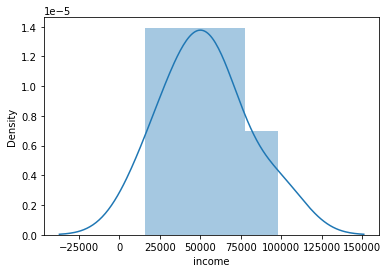

In [17]:
x=df['income']
sns.distplot(x)

In [18]:
df['income']=df['income'].fillna(df['income'].median())
df['income']

name
Allen Smith      52000.0
S Kumar          16000.0
Jack Morgan      35000.0
Ying Chin        65000.0
Dheeraj Patel    42000.0
Satyam Sharma    62000.0
James Authur     52000.0
Josh Wills       52000.0
Leo Duck         98000.0
Name: income, dtype: float64

In [19]:
df['gender']=df['gender'].fillna('F')
df['gender']

name
Allen Smith      F
S Kumar          F
Jack Morgan      M
Ying Chin        F
Dheeraj Patel    F
Satyam Sharma    F
James Authur     F
Josh Wills       F
Leo Duck         M
Name: gender, dtype: object

In [20]:
df.isnull().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

### Checking for outliers

<AxesSubplot:ylabel='performance_score'>

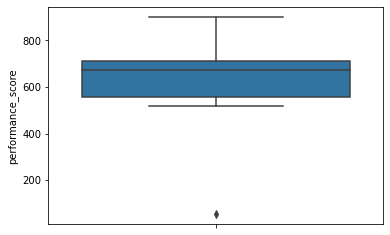

In [21]:
sns.boxplot(y='performance_score',data=df)

In [22]:
Q1 = np.percentile(df['performance_score'],25,interpolation='midpoint')
Q2 = np.percentile(df['performance_score'],50,interpolation='midpoint')
Q3 = np.percentile(df['performance_score'],75,interpolation='midpoint')
IQR = Q3 - Q1
low_limit = Q1 - IQR*1.5
up_limit = Q3 + IQR*1.5
outlier = []
for x in df['performance_score']:
    if((x > up_limit) or (x < low_limit)):
        outlier.append(x)
ind1 = df['performance_score']<low_limit
df.loc[ind1].index 

Index(['James Authur'], dtype='object', name='name')

In [23]:
df.drop(['James Authur'],inplace=True)

<AxesSubplot:ylabel='performance_score'>

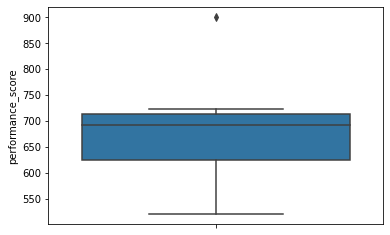

In [24]:
sns.boxplot(y='performance_score',data=df)

### Dummy encoding for Gender

In [27]:
df['gender']=pd.get_dummies(df['gender'])
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.000000,52000.0,0,Operations,G3,723
S Kumar,40.428571,16000.0,0,Finance,G0,520
Jack Morgan,32.000000,35000.0,1,Finance,G2,674
Ying Chin,45.000000,65000.0,0,Sales,G3,556
Dheeraj Patel,30.000000,42000.0,0,Operations,G2,711
Satyam Sharma,40.428571,62000.0,0,Sales,G3,649
Josh Wills,54.000000,52000.0,0,Finance,G3,901
Leo Duck,23.000000,98000.0,1,Sales,G4,709


### Standard Scaling on Performance score

In [28]:
df.performance_score.describe()

count      8.00000
mean     680.37500
std      116.16729
min      520.00000
25%      625.75000
50%      691.50000
75%      714.00000
max      901.00000
Name: performance_score, dtype: float64

In [34]:
from sklearn import preprocessing
standardisation = preprocessing.StandardScaler()
x=df['performance_score']
x=pd.DataFrame(x)
x=standardisation.fit_transform(x)

In [35]:
x=pd.DataFrame(x)
x.columns=['performance_score']

x.describe()

,performance_score
count,8.000000e+00
mean,4.857226e-17
std,1.069045e+00
min,-1.475872e+00
25%,-5.026938e-01
50%,1.023793e-01
75%,3.094385e-01
max,2.030331e+00
